In [1]:
import sys
sys.path.append('..')

import torch
from torch.nn import BCELoss, BCEWithLogitsLoss
from torch.optim import Adam
from torchvision.models import resnet18

from lib.models import SimpleClassifier, ResNet, get_resnet
from lib.trainer import Trainer
from lib.utils import train_parse_args, get_data_loaders
from lib.constants import HYPERPARAMETERS

In [2]:
params = HYPERPARAMETERS
params['batch_size'] = 4
params['n_epochs'] = 100
params['verbose'] = True
params['version'] = 0.7

if not params['disable_cuda'] and torch.cuda.is_available():
    params['device'] = torch.device('cuda:1')
else:
    params['device'] = torch.device('cpu')
    
for p in params:
    print(f"{p} : \t{params[p]}")

batch_size : 	4
checkpoints_dir : 	/home/sergevkim/git/FacesClassification/checkpoints
checkpoint_filename : 	
disable_cuda : 	False
imgs_dir : 	/home/sergevkim/git/FacesClassification/data/CelebaHQ
label : 	Male
labels_filename : 	/home/sergevkim/git/FacesClassification/data/list_attr_celeba.txt
logs_dir : 	/home/sergevkim/git/FacesClassification/logs
n_epochs : 	100
n_imgs : 	30000
verbose : 	True
version : 	0.7
device : 	cuda:1


In [ ]:
from torch.nn import CrossEntropyLoss
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize

from lib.mnist_trainer import Trainer
from lib.models import SimpleClassifierMNIST
'''
loaders = get_data_loaders(
    imgs_dir=params['imgs_dir'],
    labels_filename=params['labels_filename'],
    batch_size=params['batch_size'],
    n_imgs=params['n_imgs'])
'''
train_loader = torch.utils.data.DataLoader(MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=True,
                                                          transform=Compose([
                                                              ToTensor(), # first, convert image to PyTorch tensor
                                                              Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

valid_loader = torch.utils.data.DataLoader(MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=True,
                                                          transform=Compose([
                                                              ToTensor(), # first, convert image to PyTorch tensor
                                                              Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

loaders = {
    'train_loader': train_loader,
    'valid_loader': valid_loader,
}
model = SimpleClassifierMNIST()
model.to(params['device'])

optimizer = Adam(model.parameters(), lr=3e-4)
criterion = CrossEntropyLoss()
trainer = Trainer(params, model, optimizer, criterion)

trainer.run(loaders)

/home/sergevkim/git/FacesClassification/lib/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.Softmax()(x)


0 0.2
100 0.0
200 0.0
300 0.1
400 0.0
500 0.2
600 0.3
700 0.0
800 0.2
900 0.1
1000 0.1
1100 0.0
1200 0.0
1300 0.2
1400 0.1
1500 0.2
1600 0.0
1700 0.1
1800 0.0
1900 0.2
2000 0.0
2100 0.0
2200 0.0
2300 0.0
2400 0.1
2500 0.0
2600 0.2
2700 0.0
2800 0.2
2900 0.1
3000 0.2
3100 0.2
3200 0.2
3300 0.1
3400 0.1
3500 0.0
3600 0.1
3700 0.1
3800 0.1
3900 0.0
4000 0.2
4100 0.1
4200 0.3
4300 0.1
4400 0.1
4500 0.2
4600 0.0
4700 0.3
4800 0.0
4900 0.4
5000 0.2
5100 0.0
5200 0.1
5300 0.1
5400 0.1
5500 0.1
5600 0.0
5700 0.2
5800 0.2
5900 0.4
0.1049999999999999 6000
EPOCH 1
train 1 0 2.3008558875457017
train 1 100 1.8800347451911386
train 1 200 2.143643359334269
train 1 300 2.0360805372784694
train 1 400 1.955634785233255
train 1 500 1.7900535074570463
train 1 600 2.160495777477064
train 1 700 1.954481835614334
train 1 800 1.8414307551608098
train 1 900 1.7613119400916961
train 1 1000 1.7598172364180555
train 1 1100 1.6396235235933916
train 1 1200 2.15428836381022
train 1 1300 1.7487989968173125
train 1 14

In [ ]:
loaders = get_data_loaders(
    imgs_dir=params['imgs_dir'],
    labels_filename=params['labels_filename'],
    batch_size=params['batch_size'],
    n_imgs=params['n_imgs'])

model = ResNet()
model.cuda()

optimizer = Adam(model.parameters(), lr=3e-4)
criterion = BCELoss()
trainer = Trainer(params, model, optimizer, criterion)

trainer.run(loaders)

In [ ]:
from lib.models import get_resnet
from lib.utils import log_grad_norm


loaders = get_data_loaders(
    imgs_dir=params['imgs_dir'],
    labels_filename=params['labels_filename'],
    batch_size=params['batch_size'],
    n_imgs=params['n_imgs'])

model = get_resnet()
#model.fc.register_backward_hook(log_grad_norm)
#model = SimpleClassifier()
model.cuda()

optimizer = Adam(model.parameters(), lr=1e-4)
criterion = BCEWithLogitsLoss()
trainer = Trainer(params, model, optimizer, criterion)

trainer.run(loaders)

<class 'numpy.ndarray'>
tensor([[[[0.7294, 0.7294, 0.7294,  ..., 0.3569, 0.3569, 0.3569],
          [0.7294, 0.7294, 0.7294,  ..., 0.3569, 0.3569, 0.3569],
          [0.7333, 0.7333, 0.7333,  ..., 0.3569, 0.3569, 0.3569],
          ...,
          [0.3569, 0.3569, 0.3529,  ..., 0.1294, 0.1294, 0.1294],
          [0.3569, 0.3569, 0.3529,  ..., 0.1255, 0.1294, 0.1294],
          [0.3569, 0.3569, 0.3529,  ..., 0.1255, 0.1294, 0.1294]],

         [[0.5412, 0.5412, 0.5412,  ..., 0.2549, 0.2549, 0.2549],
          [0.5412, 0.5412, 0.5451,  ..., 0.2549, 0.2510, 0.2510],
          [0.5451, 0.5451, 0.5451,  ..., 0.2510, 0.2510, 0.2510],
          ...,
          [0.2667, 0.2667, 0.2627,  ..., 0.1098, 0.1098, 0.1137],
          [0.2667, 0.2667, 0.2627,  ..., 0.1098, 0.1098, 0.1098],
          [0.2667, 0.2667, 0.2627,  ..., 0.1098, 0.1098, 0.1098]],

         [[0.3529, 0.3529, 0.3529,  ..., 0.1490, 0.1490, 0.1490],
          [0.3529, 0.3529, 0.3569,  ..., 0.1490, 0.1490, 0.1490],
          [0.3569,

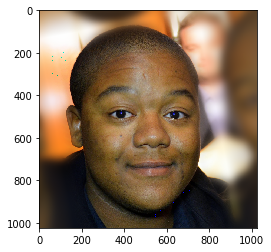

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor


a = np.array(Image.open("data/CelebaHQ/10.png"))
print(type(a))
plt.imshow(a)
a = ToTensor()(a).cuda()
a = a[np.newaxis, ...]
print(a)


print(model(a))

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from scipy.linalg import norm

a = np.array([0, 1, 1])
b = np.array([0.1, 0.2, 2.])

#b = normalize(b[..., np.newaxis])
b = np.round(b)
print(b)

accuracy_score(a, b, normalize=True)

[0. 0. 2.]


0.3333333333333333

In [ ]:
model = get_resnet()
print(model)

In [ ]:
import torch 
a = torch.ones(5)
a.requires_grad = True

b = 2*a

b.retain_grad()   # Since b is non-leaf and it's grad will be destroyed otherwise.

c = b.mean()

c.backward()

print(a.grad, b.grad)

# Redo the experiment but with a hook that multiplies b's grad by 2. 
a = torch.ones(5)

a.requires_grad = True

b = 2*a

b.retain_grad()

b.register_hook(lambda x: print('!', x))  
print(123)
b.mean().backward() 
print(456)
print(a.grad, b.grad)